### Exercise 1:

### 1. Plot the below univariate quadratic function ($0.0 < x < 4.0$)
##        $$f(x) = x^2 - 4x + 4.5$$
### 2. Compute the derivative wrt $x$ 
### 3. Implement the gradient descent algorithm to find the value of $x$ that minimizes $f(x)$ 
### 4. Superimpose the gradient descent iterations on the graph in (1) 

In [120]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
import csv
# this line plots graphs in line
#%matplotlib inline


[4.5        4.18013328 3.87359434 3.58038317 3.30049979 3.03394419
 2.78071637 2.54081633 2.31424406 2.10099958 1.90108288 1.71449396
 1.54123282 1.38129946 1.23469388 1.10141608 0.98146606 0.87484382
 0.78154935 0.70158267 0.63494377 0.58163265 0.54164931 0.51499375
 0.50166597 0.50166597 0.51499375 0.54164931 0.58163265 0.63494377
 0.70158267 0.78154935 0.87484382 0.98146606 1.10141608 1.23469388
 1.38129946 1.54123282 1.71449396 1.90108288 2.10099958 2.31424406
 2.54081633 2.78071637 3.03394419 3.30049979 3.58038317 3.87359434
 4.18013328 4.5       ]


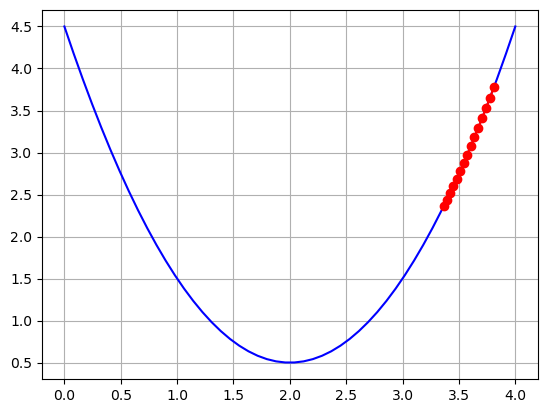

x_N =  3.337861185005583


In [121]:
%matplotlib inline

x = np.linspace(0.,4.,50)
y = x**2.0 - 4*x + 4.5
print(y)
x_i = 4-np.random.rand()*.2
#x_i=3.8
alpha=0.1
alpha = 0.8 #converges
#alpha = 0.9 #convergesbut takes longer
alpha = 1.01 #diverges
alpha = 0.01
N=15
xx = np.zeros(shape=(N),dtype=float)
yy = np.zeros_like(xx)
for itr in range(N):
    xx[itr] = x_i
    yy[itr] = x_i**2.0 - 4*x_i + 4.5
    x_i = x_i - alpha * (2*x_i -4)  # update equation

    #print "z = ",z
plt.plot(x,y,'b',xx,yy,'ro',xx,yy,'r')
plt.grid()
plt.savefig("univariate_GD.png")
plt.show()
print("x_N = ",x_i)



### What if we don't know the derivative?

### We need to use $\Delta y / \Delta x$, aka finite difference method

[4.03762142 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
[4.65190107 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]


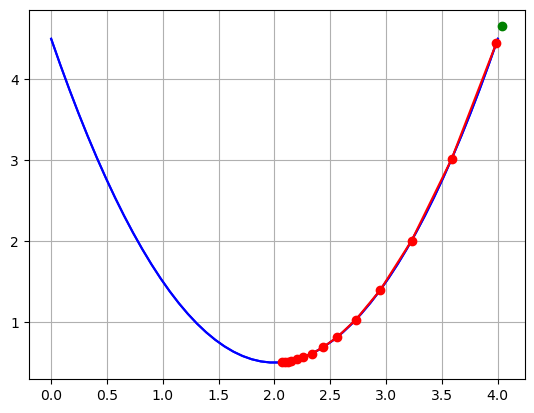

x_N =  2.053528863724453


In [122]:
%matplotlib inline

x = np.linspace(0.,4.,50)
y = x**2.0 - 4*x + 4.5
x_i = 4-np.random.rand()*.2
#x_i=3.8
alpha=0.1
#alpha = 0.8 #converges
#alpha = 0.9 #convergesbut takes longer
#alpha = 1.01 #diverges
N=15
xx = np.zeros(shape=(N),dtype=float)
yy = np.zeros_like(xx)


### NEW ###
# Take a small step in one direction to get the first gradient
step = x_i + 0.05
xx[0] = step
yy[0] = step**2.0 - 4*step + 4.5 # we assume we can always measure the objective function
print(xx)
print(yy)


for itr in range(1,N):
    xx[itr] = x_i
    yy[itr] = x_i**2.0 - 4*x_i + 4.5
    x_i = x_i - alpha * (yy[itr]-yy[itr-1])/(xx[itr]-xx[itr-1])  # update equation

    #print "z = ",z
plt.plot(x,y,'b',xx[0],yy[0],'go',xx[0],yy[0],'g')
plt.plot(x,y,'b',xx[1:],yy[1:],'ro',xx[1:],yy[1:],'r')
plt.grid()
#plt.savefig("univariate_GD.png")
plt.show()
print("x_N = ",x_i)




### Exercise 2:

### 1. Plot the below bi-variate quadratic function on a 3D wireframe graph.
##        $$f(x,y) = x^2 + y^2 + 1$$
### for $-20.0 < x < 20.0$ and $-20.0<y<20.0$
### 2. Compute the partial derivatives wrt $x$ and $y$
### 3. Implement the gradient descent algorithm to find the value of $(x,y)$ that minimizes $f(x,y)$ 
### 4. Superimpose the gradient descent iterations on the graph in (1) 

In [123]:
def f(x,y,a,b,c):
    return a*x**2.0 + b*y**2.0 + c

N=15
x = np.linspace(-20.,20.,N)
y = np.linspace(-20,20.,N)

X = np.repeat(x,N).reshape(N,N)
#print X
Y = np.tile(y,N).reshape(N,N)
#print Y

In [124]:
a = 1.; b = 1.; c=1
Z=f(X, Y, a, b, c)
Z.shape
print(np.min(Z))
print(Z[14,14])

1.0
801.0


In [125]:
x_, y_ = np.random.rand(2)*20
print(x_, y_)
x_, y_ = [10,20]
alpha=0.1
#alpha = 0.8 #converges
#alpha = 0.9 #convergesbut takes longer
#alpha = 1.01 #diverges
N=20
xx = np.zeros(shape=(N),dtype=float)
yy = np.zeros_like(xx)
zz = np.zeros_like(xx)
for itr in range(N):
    xx[itr] = x_
    yy[itr] = y_
    zz[itr] = f(x_,y_,1.,1.,1.)

    x_ = x_ - alpha * (2*x_)  # update equation for x
    y_ = y_ - alpha * (2*y_)  # update equation for y
print("x, y, z = ",x_, y_, zz[-1])

7.227321475037412 9.32462237920977
x, y, z =  0.11529215046068471 0.23058430092136942 1.1038459371706966


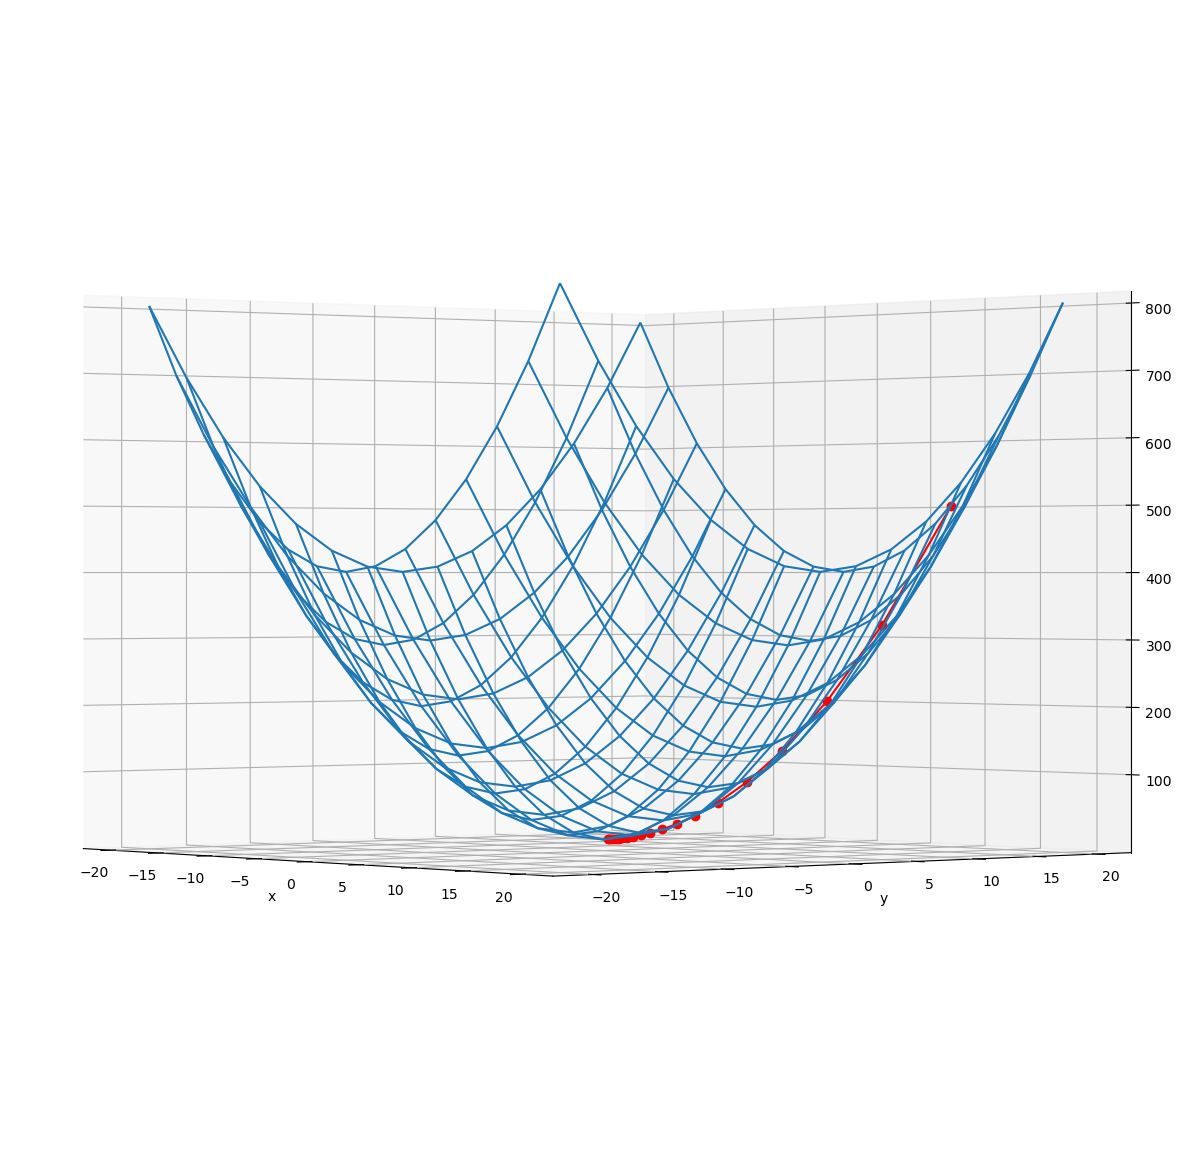

In [126]:
%matplotlib inline

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1)
ax.plot3D(xx,yy,zz,'ro')
ax.plot3D(xx,yy,zz,'r')
ax.view_init(90, 10) # elevation, azimuth
ax.view_init(65, -40) # elevation, azimuth
ax.view_init(0, -40) # elevation, azimuth
# ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.savefig("bivariate_GD.png")
plt.show()


### Optimal Step Size - Exercise 1:

### Consider function:
##        $$f(x) = x^2 -5x + 7$$
### Let $x = 1$ be the starting point
### Compute $d$ at $x = 1$
### Find $\alpha$ that minimizes $f(x + \alpha d)$ 
### Answer: $\alpha = 0.5$

In [127]:
def interval_halving(f, a, b, eps=0.01):
    
    count_fn_calls = 0
    delta = b-a
    x_m = a + delta/2
    y_m = f(x_m)
    count_fn_calls += 1
    
    while delta > eps:
        x_l = a + delta/4
        y_l = f(x_l)
        count_fn_calls += 1
        x_u = b - delta/4
        y_u = f(x_u)
        count_fn_calls += 1
        
        if y_l < y_m:
            b = x_m
            x_m = x_l
            y_m = y_l
            delta = b-a
        elif y_u < y_m:
            a = x_m
            x_m = x_u
            y_m = y_u
            delta = b-a
        else:
            a = x_l
            b = x_u
            delta = b-a
            
    print(count_fn_calls)
            
    return [a,b]

In [128]:
def func_1(x):
    return x**2 - 5*x + 7

def grad_func_1(x):
    return 2*x - 5

In [129]:
x_init = 1

d = -grad_func_1(x_init)

def line_search(alpha):
    return func_1(x_init + alpha*d)

result = interval_halving(line_search, -5, 5)

print(result)

21
[0.4931640625, 0.5029296875]


### Now let's try with $\alpha = 0.5$

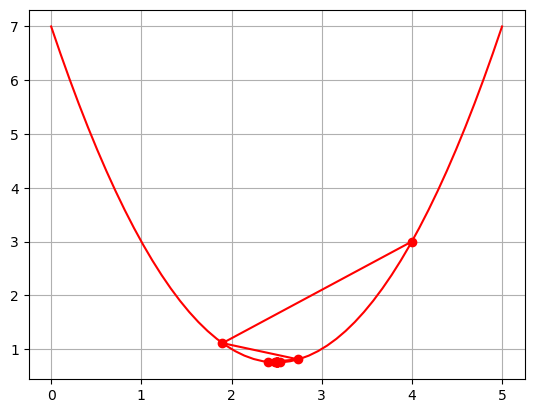

x_N =  2.499998389387264


In [ ]:
%matplotlib inline

x = np.linspace(0.,5.,50)
y = func_1(x)
x_i = 4-np.random.rand()*.2
x_i=4
alpha=0.5
alpha = 0.3 #converges but takes longer
alpha = 0.7 #converges but takes longer
N=15
xx = np.zeros(shape=(N),dtype=float)
yy = np.zeros_like(xx)
for itr in range(N):
    xx[itr] = x_i
    yy[itr] = func_1(x_i)
    x_i = x_i - alpha * grad_func_1(x_i)  # update equation

    #print "z = ",z
plt.plot(x,y,'b',xx,yy,'ro',xx,yy,'r')
plt.grid()
plt.show()
print("x_N = ",x_i)

### Optimal Step Size - Exercise 2:

### Consider function:
##        $$f(x_1,x_2,x_3) = \sin(x_1x_2) + e^{x_2+x_3} - x_3$$
### Let $x = [1,2,3]$ be the starting point
### and $d = [0,-1,-1]$
### Use a line search algorithm to find $\alpha$ that minimizes $f(x + \alpha d)$ 
### Answer: $\alpha = 3.127$

In [131]:
def func_2(x1,x2,x3):
    return np.sin(x1*x2) + np.exp(x2+x3) - x3

#def grad_func_2(x1,x2,x3):
#    return np.array([np.cos(x1*x2)*x2, np.cos(x1*x2)*x1 + np.exp(x2+x3), np.exp(x2+x3)-1])

In [132]:
x_init = [1,2,3]

d = [0,-1,-1]

def line_search2(alpha):
    return func_2(x_init[0] + alpha*d[0], x_init[1] + alpha*d[1], x_init[2] + alpha*d[2])

result = interval_halving(line_search2, -5, 10)

print(result)

23
[3.12255859375, 3.1298828125]
